In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('lemmatized_wHM_full.csv')

In [3]:
df = df[df['lemmatized'].notna()]

In [4]:
df['lemmatized'] = df['lemmatized'].str.lower()

In [5]:
tweets = df[df['lemmatized'].str.contains('prabalgurung')]
tweets['lemmatized'] = tweets['lemmatized'].apply(lambda x : x.replace('prabalgurung', ''))
tweets.head()

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at,mentions,hashtags,is_retweet,clean_text,lemmatized
3989,3989,1225437812318752768,1581002116,2020-02-06 15:15:16,anapaulalima,#tbt com o estilista @prabalgurung porque hoje...,none,0.0,NaN,NaN,...,458,135,117,NaN,2009-04-30 03:05:03,prabalgurung,tbt; nyfw; fashionweek; desfile; anapaulalimas...,False,tbt com o estilista prabalgurung porque hoje i...,tbt estilista hoje iniciar mais semana moda n...
13509,13509,1225601197823975426,1581041070,2020-02-07 02:04:30,CheriStories,#AjaNaomiKing in #PrabalGurung Pre-Fall 2020 a...,none,0.0,NaN,NaN,...,1123,1417,85,NaN,2011-01-14 01:27:02,NaN,AjaNaomiKing; PrabalGurung; Essence; BlackWome...,False,AjaNaomiKing in PrabalGurung Pre-Fall 2020 at ...,ajanaomike pre- fall essence blackwomeninholl...
25287,25287,1225796939096166401,1581087739,2020-02-07 15:02:19,CheriStories,#NaomiScott in #PrabalGurung Fall 2019 & #Bulg...,none,0.0,NaN,NaN,...,1123,1417,85,NaN,2011-01-14 01:27:02,NaN,NaomiScott; PrabalGurung; Bulgari; blog; tapfo...,False,NaomiScott in PrabalGurung Fall 2019 & Bulgari...,naomiscott fall bulgari jewelry bulgari b.zer...
30274,30274,1225875636218191872,1581106501,2020-02-07 20:15:01,EmmaJBridgeman,When your design for @prabalgurung pops up on ...,none,0.0,NaN,NaN,...,45,2,0,NaN,2019-09-16 09:46:16,prabalgurung; netflix; Next; priyankachopra,printdesign; netflix; nextinfashion; textilede...,False,When your design for prabalgurung pops up on n...,when design pop netflix next fashion printdes...
42203,42203,1226128618952286208,1581166817,2020-02-08 13:00:17,ZoyaNailPolish,We are very excited to share with you that we ...,none,NaN,NaN,NaN,...,5502,5954,1462,NaN,2009-01-23 21:23:37,prabalgurung; nyfw,zoyanyfw; prabalgurung; nyfw; nyfwfw20,False,We are very excited to share with you that we ...,very excited share official nail sponsor seaso...


# We can now proceed with the proper LDA 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['accomplish',
 'adventure',
 'astrid',
 'beatriz',
 'beautiful',
 'bottle',
 'browning',
 'celebrate',
 'chen',
 'collection',
 'designer',
 'diversity',
 'energy',
 'eva',
 'fall',
 'fall20',
 'fancam',
 'fashion',
 'full',
 'gift',
 'goal',
 'gown',
 'gurung',
 'logan',
 'look',
 'make',
 'more',
 'new',
 'nyfw20',
 'nyfw2020',
 'post',
 'prabal',
 'recycle',
 'runway',
 'sho',
 'show',
 'so',
 'stephanie',
 'taffeta',
 'take',
 'thank',
 'theo',
 'there',
 'tiffany',
 'tiffanyyoung',
 'tiffanyyy',
 'video',
 'wargo',
 'wear',
 'week',
 'york',
 'young',
 '소녀시대',
 '티파니']

In [7]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

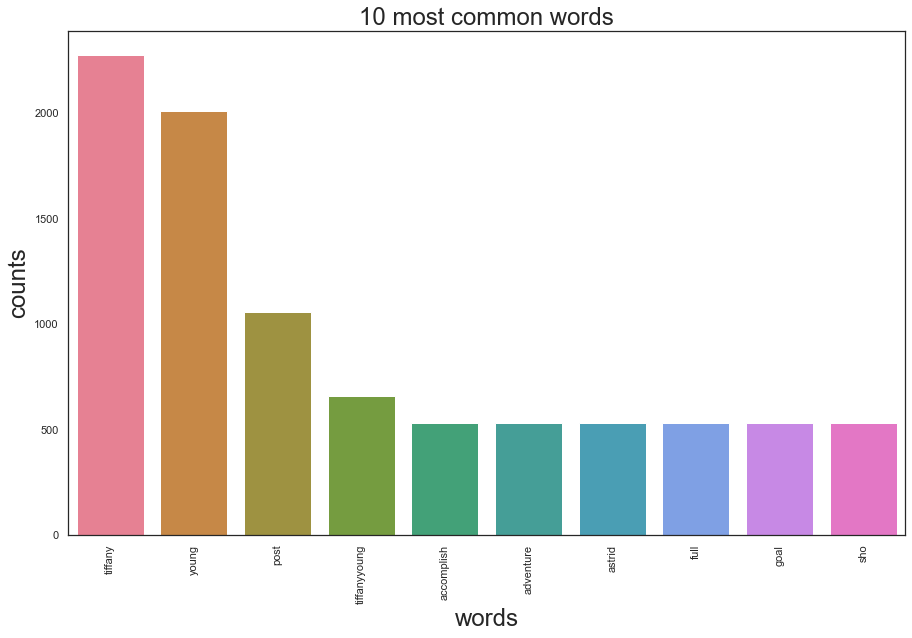

In [8]:
plot_10_most_common_words(tf,vectorizer)

## Fit LDA model
We start by trying with a model with 5 topics.
- `n_components`: number of topics = 3
- `learning_decay`: which controls the learning rate = 0.9.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 4
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, 
                                  random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [10]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -46060.334046181626
Perplexity:  16.155510400828057
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 4, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [12]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words, array):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        array.append([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [13]:
print("Topics found via LDA:")
number_of_words = 20
array = []
print_topics(model, vectorizer, number_of_words, array)

Topics found via LDA:

Topic #0:
tiffany tiffanyyoung nyfw20 fancam young 티파니 take gift show wargo theo fashion nyfw2020 week york new designer logan prabal gurung

Topic #1:
tiffanyyoung show energy designer new york nyfw2020 collection look make more celebrate diversity taffeta recycle bottle gown fall20 runway fall

Topic #2:
young tiffany 티파니영 소녀시대 gurung prabal fashion york new week designer logan eva beatriz browning chen stephanie fall wear runway

Topic #3:
post accomplish video goal full thank there tiffanyyy sho astrid adventure young tiffany fashion tiffanyyoung designer nyfw20 fancam show logan


In [15]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

We can save the model so not to have to generate it again

In [43]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_of_topics))
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [17]:
pyLDAvis.save_html(LDAvis_prepared, './prabalgurung'+ str(number_of_topics) +'.html')

In [14]:
df = pd.DataFrame(columns=['topic','word'])

In [15]:
for i in range(len(array)):
    for j in range(len(array[i])):
        df = df.append({'topic' : i+1, 'word' : array[i][j]}, ignore_index=True)

In [18]:
df.to_csv('topic_word_prabal_gurung.csv')